In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

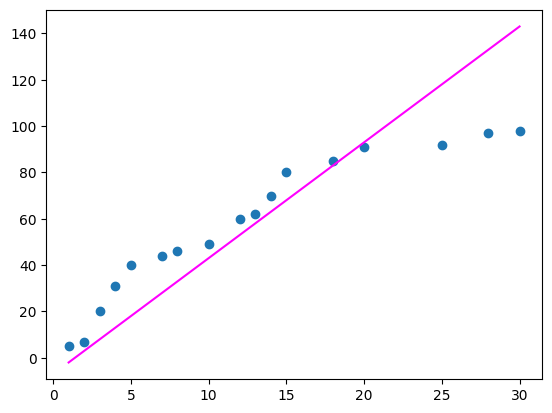

In [23]:

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])
#plt.plot(df['공부시간(x)'],df['공부시간(x)']*2 + 3 ,color = 'red')
#plt.plot(df['공부시간(x)'],df['공부시간(x)']*3 + 3 ,color = 'blue')
#plt.plot(df['공부시간(x)'],df['공부시간(x)']*4 + 3 ,color = 'green')
plt.plot(df['공부시간(x)'],df['공부시간(x)']*5 -7 ,color = 'magenta')
plt.show()

In [30]:
#loss 함수 평균제곱오차 구하기
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

#model >>  y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]
# y = XW + b
#dot >> 행렬 곱
    y = np.dot(x_data,input_W) + input_b
#mean 평균 power n승 (제곱)
    return np.mean(np.power((t_data-y),2))

def numerical_derivative(f,x):
    # f : 미분하려는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray

    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # shape을 똑같이 0으로 채움

    it = np.nditer(x,flags = ['multi_index'])

    while not it.finished: # iterator가 끝나지 않을 때까지만 반복 , 즉, 끝나면 반복종료
        idx = it.multi_index # 현재의 index를 추출 => tuple 형태로 리턴
        tmp = x[idx] 
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x) # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()
    
    return derivative_x

# 학습이 다 종료되면 (모델이 완성되면)
# 예측작업을 해야함

def predict(x):

    return np.dot(x,W) + b

learning_rate = 1e-4

#학습 진행

for step in range(300000):
    #현재 W는 2차원 b는 1차원
    #loss함수안으로 들어갈때는 1차원 안에 두 값이 순서대로 들어감
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param) 

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')
        print(input_param)
        

W : [[0.79145429]], b : [0.3508379], loss : 21.295661476935816
[0.78839876 0.34998094]
W : [[2.02933234]], b : [0.89410094], loss : 0.002041393247602075
[2.02933333 0.89409736]
W : [[2.01063749]], b : [0.96159527], loss : 0.00026847995693921007
[2.01063785 0.96159397]
W : [[2.00385773]], b : [0.98607237], loss : 3.5309946950547066e-05
[2.00385786 0.9860719 ]
W : [[2.00139902]], b : [0.99494909], loss : 4.643893599601895e-06
[2.00139907 0.99494892]
W : [[2.00050736]], b : [0.99816827], loss : 6.107555979810204e-07
[2.00050738 0.9981682 ]
W : [[2.000184]], b : [0.99933571], loss : 8.032535467790755e-08
[2.000184   0.99933569]
W : [[2.00006673]], b : [0.99975909], loss : 1.0564229988375007e-08
[2.00006673 0.99975909]
W : [[2.0000242]], b : [0.99991263], loss : 1.389386398778119e-09
[2.0000242  0.99991263]
W : [[2.00000878]], b : [0.99996832], loss : 1.827293202952072e-10
[2.00000878 0.99996832]


In [25]:
predict_result = predict(np.array([7]).reshape(1,1))
print(predict_result)
print(x_data)

[[15.00000375]]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [31]:
# Tensorflow Keras 구현

import numpy as np

from keras.api._v2.keras.models import Sequential
from keras.api._v2.keras.layers import Flatten, Dense
from keras.api._v2.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# Model 생성
model = Sequential()

# Model안에 layer를 생성
model.add(Flatten(input_shape=(1,)))
model.add(Dense(units=1,
                activation='linear'))
# 모델이 완성되면 compile 옵션들을 설정해야 함
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss = 'mse')

# 모델 학습
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose = 0)

Epoch 1/5000
1/1 [==============================] - 0s 167ms/step - loss: 117.7417
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 68.6159
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 39.9878
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 23.3048
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 13.5827
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9171
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.6155
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6915
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5702
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9168
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5360
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3141
Epoch 13/5000
1/1 [======================

In [27]:
print(model.predict(np.array([[10]])))

1/1 [==============================] - 0s 38ms/step


[[21.000032]]


In [28]:
from sklearn import linear_model

x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data,t_data)

print(sklearn_model.predict(np.array([[10]])))


[[21.]]


In [29]:
df = pd.read_csv('C:/Users/user/Desktop/my_ws/edu/machinelearning/files/ozone.csv')
train_df = df[['Temp','Ozone']]
train_df = train_df.dropna(how='any')
train_df

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0
